In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Exploration.csv to Exploration.csv


In [4]:
df=pd.read_csv("Exploration.csv")

In [5]:
df.head()

Serial Number Company           Location          Dates  \
0              1  google               none   Dec 11, 2018   
1              2  google  Mountain View, CA   Jun 21, 2013   
2              3  google       New York, NY   May 10, 2014   
3              4  google  Mountain View, CA    Feb 8, 2015   
4              5  google    Los Angeles, CA   Jul 19, 2018   

                                  Job-Title  \
0     Current Employee - Anonymous Employee   
1         Former Employee - Program Manager   
2  Current Employee - Software Engineer III   
3     Current Employee - Anonymous Employee   
4       Former Employee - Software Engineer   

                                             Summary  \
0                           Best Company to work for   
1  Moving at the speed of light, burn out is inev...   
2  Great balance between big-company security and...   
3  The best place I've worked and also the most d...   
4                    Unique, one of a kind dream job   

                                                Pros  \
0                      People are smart and friendly   
1  1) Food, food, food. 15+ cafes on main campus ...   
2  * If you're a software engineer, you're among ...   
3  You can't find a more well-regarded company th...   
4  Google is a world of its own. At every other c...   

                                                Cons  \
0                 Bureaucracy is slowing things down   
1  1) Work/life balance. What balance? All those ...   
2  * It *is* becoming larger, and with it comes g...   
3  I live in SF so the commute can take between 1...   
4  If you don't work in MTV (HQ), you will be giv...   

                                 Advice-to-Mangement  Overall-Ratings  \
0                                               none                5   
1  1) Don't dismiss emotional intelligence and ad...                4   
2  Keep the focus on the user. Everything else wi...                5   
3  Keep on NOT micromanaging - that is a huge ben...                5   
4  Promote managers into management for their man...                5   

  Work-Balance Culture-Values Career-Opportunities Company-Benefit  \
0            4              5                    5               4   
1            2              3                    3               5   
2            5              4                    5               5   
3            2              5                    5               4   
4            5              5                    5               5   

  Senior-Mangement  Helpful-Count  
0                5              0  
1                3           2094  
2                4            949  
3                5            498  
4                5             49

In [6]:
df.describe

<bound method NDFrame.describe of        Serial Number    Company           Location          Dates  \
0                  1     google               none   Dec 11, 2018   
1                  2     google  Mountain View, CA   Jun 21, 2013   
2                  3     google       New York, NY   May 10, 2014   
3                  4     google  Mountain View, CA    Feb 8, 2015   
4                  5     google    Los Angeles, CA   Jul 19, 2018   
...              ...        ...                ...            ...   
67524          67525  microsoft               none   Dec 16, 2010   
67525          67526  microsoft               none   Dec 16, 2010   
67526          67527  microsoft               none   Dec 15, 2010   
67527          67528  microsoft               none   Dec 15, 2010   
67528          67529  microsoft               none   Dec 14, 2010   

                                         Job-Title  \
0            Current Employee - Anonymous Employee   
1                Former Employee - Program Manager   
2         Current Employee - Software Engineer III   
3            Current Employee - Anonymous Employee   
4              Former Employee - Software Engineer   
...                                            ...   
67524         Former Employee - Anonymous Employee   
67525  Current Employee - Senior Marketing Manager   
67526           Current Employee - Account Manager   
67527          Current Employee - Senior Test Lead   
67528            Former Employee - Senior Director   

                                                 Summary  \
0                               Best Company to work for   
1      Moving at the speed of light, burn out is inev...   
2      Great balance between big-company security and...   
3      The best place I've worked and also the most d...   
4                        Unique, one of a kind dream job   
...                                                  ...   
67524  Enriching experience for a beginner but bad fo...   
67525               A complex and interesting experience   
67526                                 Good Place to Work   
67527  It's a competitive work place, with overload w...   
67528                                   Used to be great   

                                                    Pros  \
0                          People are smart and friendly   
1      1) Food, food, food. 15+ cafes on main campus ...   
2      * If you're a software engineer, you're among ...   
3      You can't find a more well-regarded company th...   
4      Google is a world of its own. At every other c...   
...                                                  ...   
67524  -Access to a wide range of technologies, compl...   
67525  - Once you're at Microsoft you can change role...   
67526  Nice place to work. Good atmosphere with advan...   
67527       Smart people around you, can learn from them   
67528  Compensation, Health benefits and brand name r...   

                                                    Cons  \
0                     Bureaucracy is slowing things down   
1      1) Work/life balance. What balance? All those ...   
2      * It *is* becoming larger, and with it comes g...   
3      I live in SF so the commute can take between 1...   
4      If you don't work in MTV (HQ), you will be giv...   
...                                                  ...   
67524  -Testers(SDET's ) do not get as many opportuni...   
67525  =- be prepared to be Flexible - Frequent chang...   
67526  Management confusion at times with vision for ...   
67527              Politics, weak moral, leaning loyalty   
67528  Leadership was better in the late 90's....its ...   

                                     Advice-to-Mangement  Overall-Ratings  \
0                                                   none                5   
1      1) Don't dismiss emotional intelligence and ad...                4   
2      Keep the focus on the user. Everything else wi...                5   
3      Keep on NO

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67529 entries, 0 to 67528
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Serial Number         67529 non-null  int64 
 1   Company               67529 non-null  object
 2   Location              67529 non-null  object
 3   Dates                 67528 non-null  object
 4   Job-Title             67529 non-null  object
 5   Summary               67402 non-null  object
 6   Pros                  67529 non-null  object
 7   Cons                  67529 non-null  object
 8   Advice-to-Mangement   66857 non-null  object
 9   Overall-Ratings       67529 non-null  int64 
 10  Work-Balance          67529 non-null  object
 11  Culture-Values        67529 non-null  object
 12  Career-Opportunities  67529 non-null  object
 13  Company-Benefit       67529 non-null  object
 14  Senior-Mangement      67529 non-null  object
 15  Helpful-Count         67529 non-null

In [8]:
df.isnull().sum()

Serial Number             0
Company                   0
Location                  0
Dates                     1
Job-Title                 0
Summary                 127
Pros                      0
Cons                      0
Advice-to-Mangement     672
Overall-Ratings           0
Work-Balance              0
Culture-Values            0
Career-Opportunities      0
Company-Benefit           0
Senior-Mangement          0
Helpful-Count             0
dtype: int64

In [9]:
df.columns

Index(['Serial Number', 'Company', 'Location', 'Dates', 'Job-Title', 'Summary',
       'Pros', 'Cons', 'Advice-to-Mangement', 'Overall-Ratings',
       'Work-Balance', 'Culture-Values', 'Career-Opportunities',
       'Company-Benefit', 'Senior-Mangement', 'Helpful-Count'],
      dtype='object')

In [10]:
df.shape

(67529, 16)

In [11]:
df['Advice-to-Mangement'].fillna('No advice provided',inplace=True)
df['Summary'].fillna("No summary available", inplace=True)

/tmp/ipython-input-257438265.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Advice-to-Mangement'].fillna('No advice provided',inplace=True)
/tmp/ipython-input-257438265.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [12]:
df.isnull().sum()

Serial Number           0
Company                 0
Location                0
Dates                   1
Job-Title               0
Summary                 0
Pros                    0
Cons                    0
Advice-to-Mangement     0
Overall-Ratings         0
Work-Balance            0
Culture-Values          0
Career-Opportunities    0
Company-Benefit         0
Senior-Mangement        0
Helpful-Count           0
dtype: int64

There are many rows of different columns which are filled with none and rest of the data is in int format.So here we will change those none to int zero so that we can study the data easily.This is called out as data *transformation*

In [13]:
df['Overall-Ratings']=np.where(df['Overall-Ratings']=='none',0,df['Overall-Ratings'])
df['Culture-Values']=np.where(df['Culture-Values']=='none',0,df['Culture-Values'])
df['Career-Opportunities'] =np.where(df['Career-Opportunities']=='none',0, df['Career-Opportunities'])
df['Company-Benefit'] = np.where(df['Company-Benefit'] =='none',0,df['Company-Benefit'])
df['Senior-Mangement'] = np.where(df['Senior-Mangement']=='none',0,df['Senior-Mangement'])

Through the data info we observed that few of the numeric data's datatype is in object form.So now we will change all of them in numeric datatype

In [14]:
df['Overall-Ratings']=pd.to_numeric(df['Overall-Ratings'])
df['Culture-Values']=pd.to_numeric(df['Culture-Values'])
df['Culture-Values'] = pd.to_numeric(df['Culture-Values'])
df['Career-Opportunities'] = pd.to_numeric(df['Career-Opportunities'])
df['Company-Benefit'] = pd.to_numeric(df['Company-Benefit'])
df['Senior-Mangement'] = pd.to_numeric(df['Senior-Mangement'])

Text(0.5, 1.0, 'No. of reviews per company')

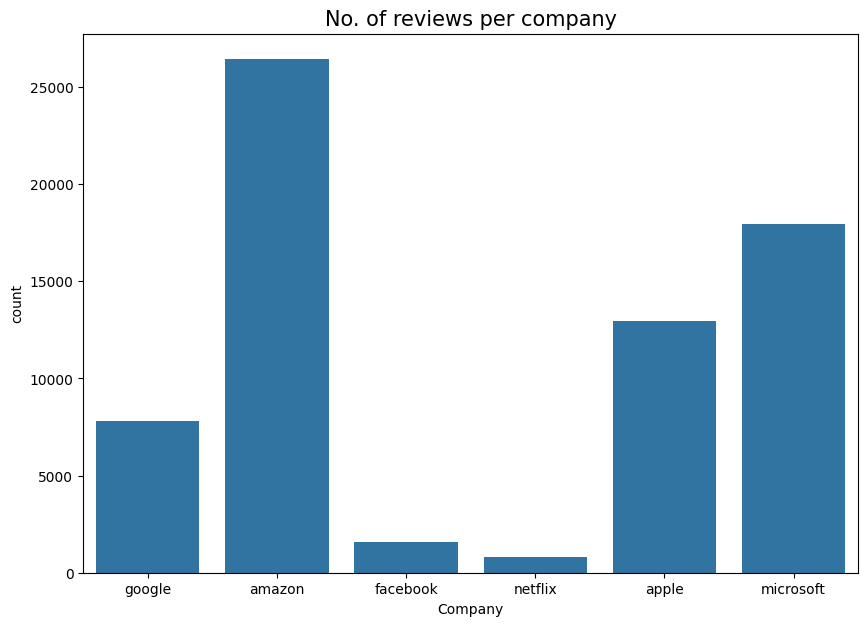

In [15]:
plt.rcParams['figure.figsize']=(10,7)
sns.countplot(x='Company',data=df)
plt.title("No. of reviews per company",fontsize=15)

/tmp/ipython-input-3997539453.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Company'], y = df['Career-Opportunities'], palette = 'colorblind')


Text(0.5, 1.0, 'Company vs Career Opportunities')

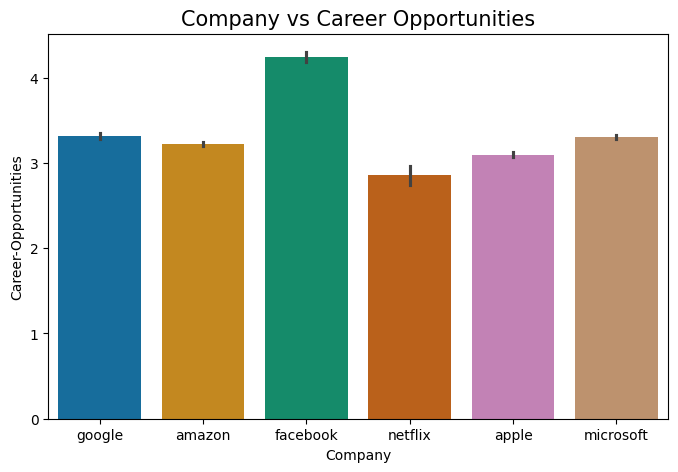

In [16]:
# company vs career opportunities

plt.rcParams['figure.figsize'] = (8, 5)
sns.barplot(x = df['Company'], y = df['Career-Opportunities'], palette = 'colorblind')
plt.title('Company vs Career Opportunities', fontsize = 15)

/tmp/ipython-input-4049528511.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df['Company'], y = df['Culture-Values'], palette = 'vlag')


Text(0.5, 1.0, 'Company vs Culture-Values')

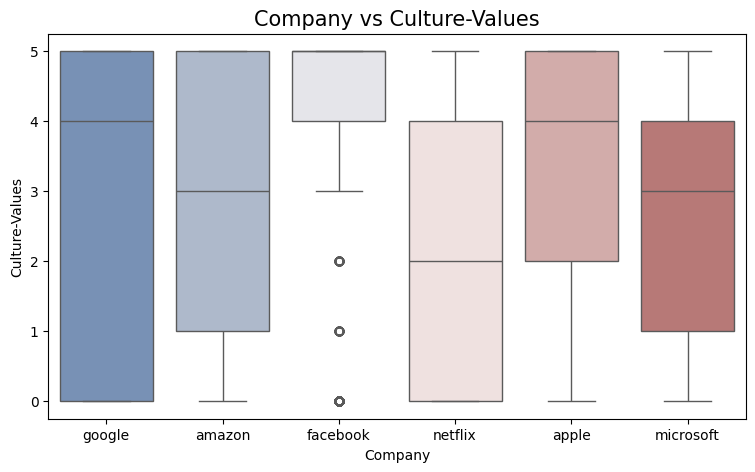

In [17]:
# company vs culture stars

plt.rcParams['figure.figsize'] = (9,5)
sns.boxplot(x = df['Company'], y = df['Culture-Values'], palette = 'vlag')
plt.title('Company vs Culture-Values', fontsize = 15)

/tmp/ipython-input-59021112.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df['Company'],y = df['Company-Benefit'], palette = 'Set2')


Text(0.5, 1.0, 'Company ve Benefits')

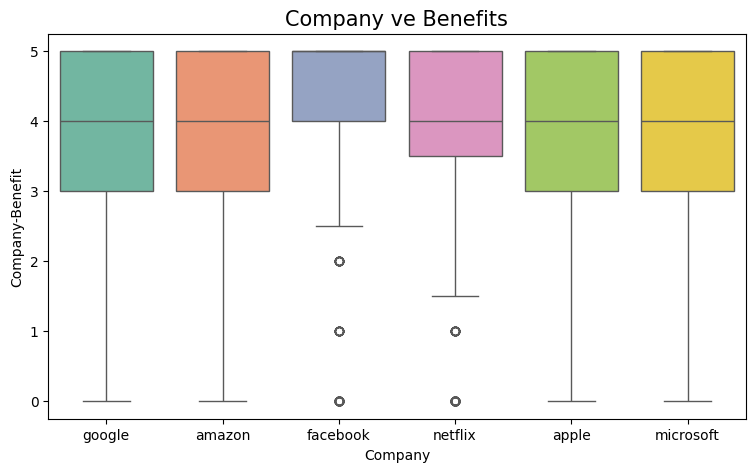

In [18]:
#Each box represents the distribution of benefit ratings given by reviewers for one company.
plt.rcParams['figure.figsize'] = (9,5)
sns.boxplot(x = df['Company'],y = df['Company-Benefit'], palette = 'Set2')
plt.title('Company ve Benefits',fontsize=15)

/tmp/ipython-input-1506456247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df['Overall-Ratings'],data=df, palette = 'Set3')


Text(0.5, 1.0, 'Overall Ratings')

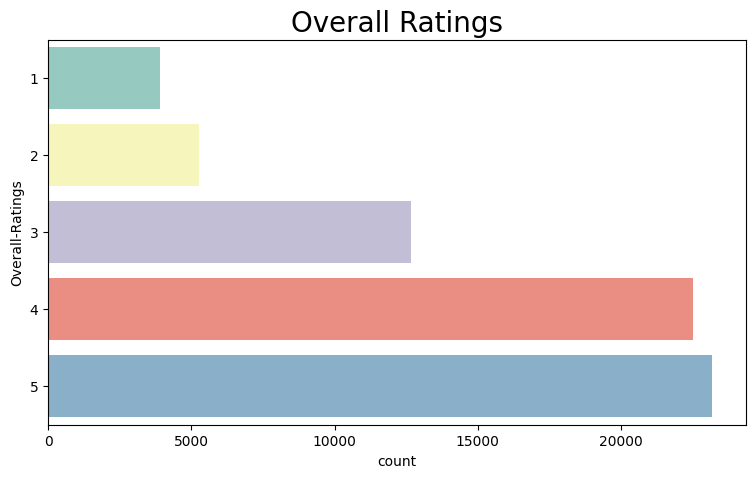

In [19]:
plt.rcParams['figure.figsize'] = (9,5)
sns.countplot(y = df['Overall-Ratings'],data=df, palette = 'Set3')
plt.title('Overall Ratings', fontsize = 20)


/tmp/ipython-input-1694136287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Company'], y = df['Senior-Mangement'], palette = 'Set1')


Text(0.5, 1.0, 'Company vs Management stars')

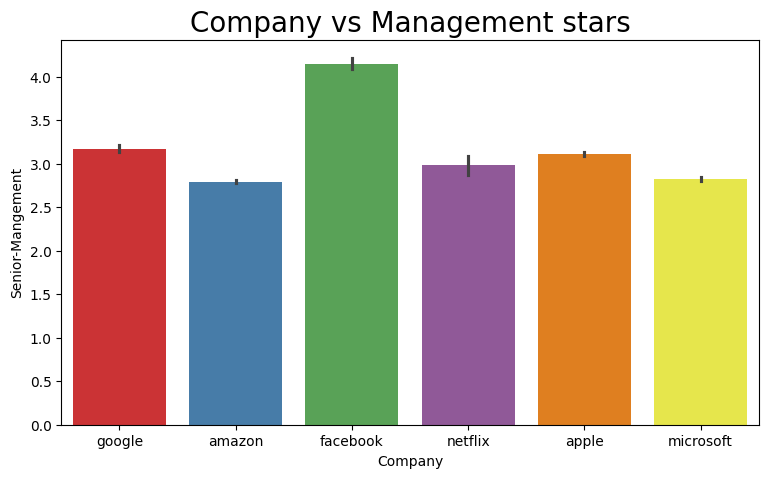

In [20]:
plt.rcParams['figure.figsize'] = (9,5)
sns.barplot(x = df['Company'], y = df['Senior-Mangement'], palette = 'Set1')
plt.title('Company vs Management stars', fontsize = 20)


/tmp/ipython-input-2938320774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x = 'Company', y='Work-Balance', data = df, palette = 'Set3')


Text(0.5, 1.0, 'Company vs Work-balance-stars')

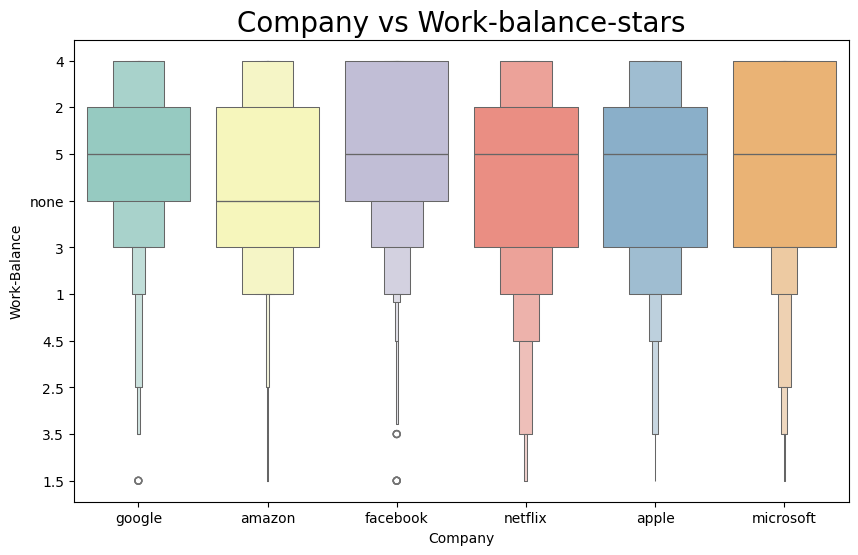

In [21]:
plt.rcParams['figure.figsize'] = (10,6)
sns.boxenplot(x = 'Company', y='Work-Balance', data = df, palette = 'Set3')
plt.title('Company vs Work-balance-stars', fontsize = 20)

/tmp/ipython-input-1953371540.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x = 'Overall-Ratings', y = 'Company', data = df, palette = 'vlag')


Text(0.5, 1.0, 'Company vs Ratings')

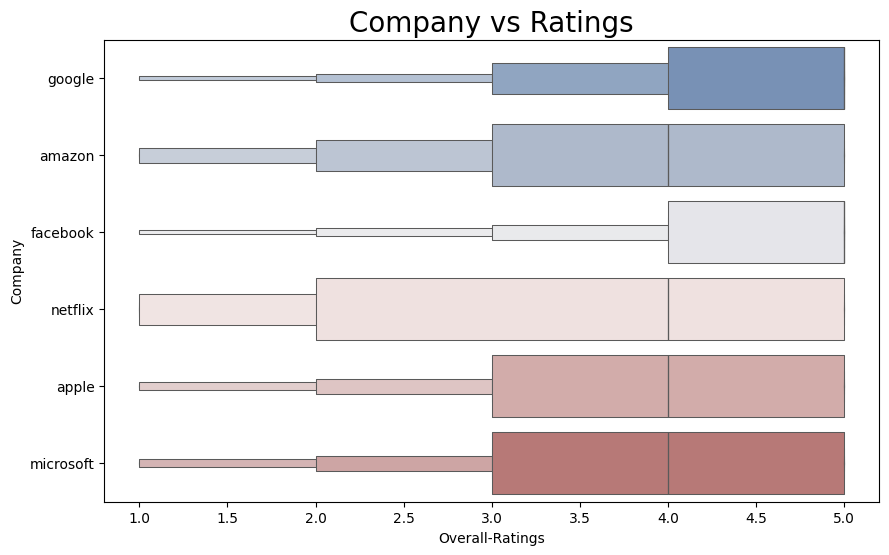

In [22]:
# company vs Rating

plt.rcParams['figure.figsize'] = (10,6)
sns.boxenplot(x = 'Overall-Ratings', y = 'Company', data = df, palette = 'vlag')
plt.title('Company vs Ratings', fontsize = 20)


(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

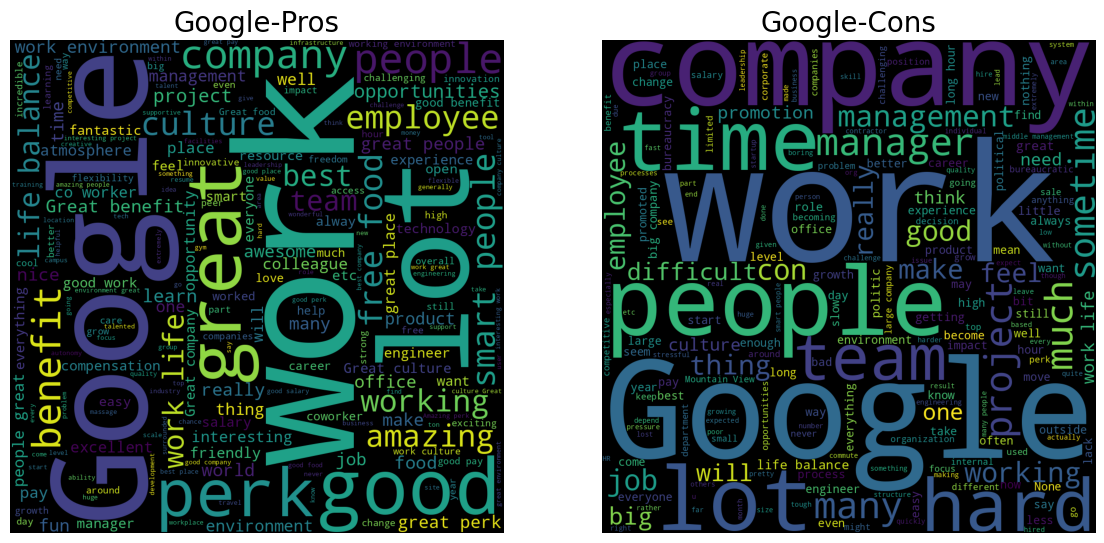

In [23]:
plt.rcParams['figure.figsize'] = (14,11)
pros=' '.join([text for text in df['Pros'][df['Company']=='google']])
wordcloud=WordCloud(background_color='black',width=1000,height=1000).generate(pros)
plt.subplot(1, 2, 1)
plt.title('Google-Pros', fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')


plt.rcParams['figure.figsize'] = (13,10)
pros=' '.join([text for text in df['Cons'][df['Company']=='google']])
wordcloud=WordCloud(background_color='black',width=1000,height=1000).generate(pros)
plt.subplot(1, 2, 2)
plt.title('Google-Cons', fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

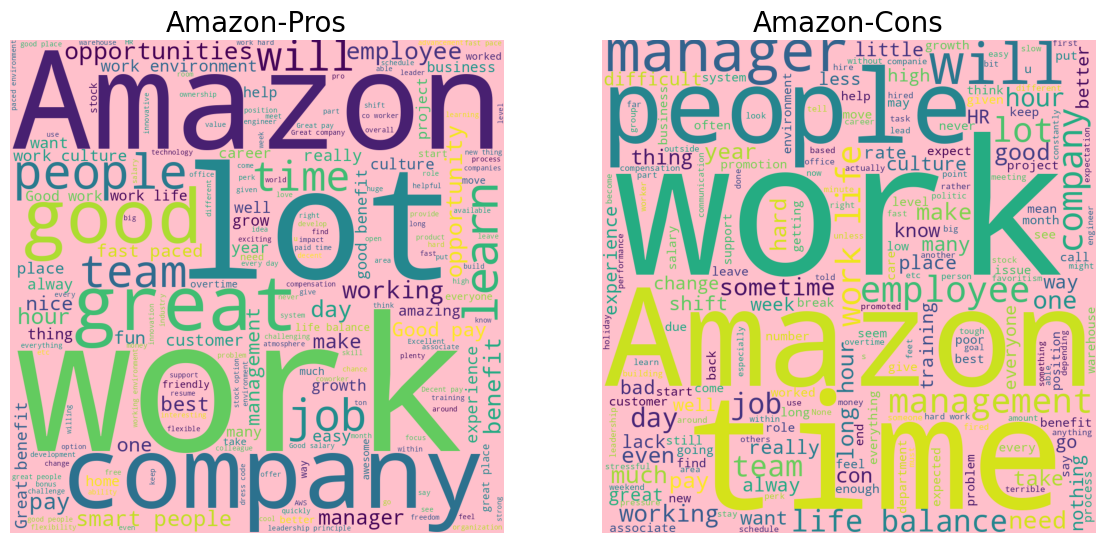

In [24]:
plt.rcParams['figure.figsize']=(14,11)

pros= ' '.join([text for text in df['Pros'][df['Company'] == 'amazon' ]])

wordcloud = WordCloud(background_color = 'pink', width = 1000,height = 1000).generate(pros)
plt.subplot(1,2,1)
plt.title('Amazon-Pros',fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons = ' '.join([text for text in df['Cons'][df['Company'] == 'amazon' ]])

wordcloud2 = WordCloud(background_color = 'pink', width = 1000, height = 1000 ).generate(cons)
plt.subplot(1,2,2)
plt.title('Amazon-Cons',fontsize = 20)
plt.imshow(wordcloud2)
plt.axis('off')

(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

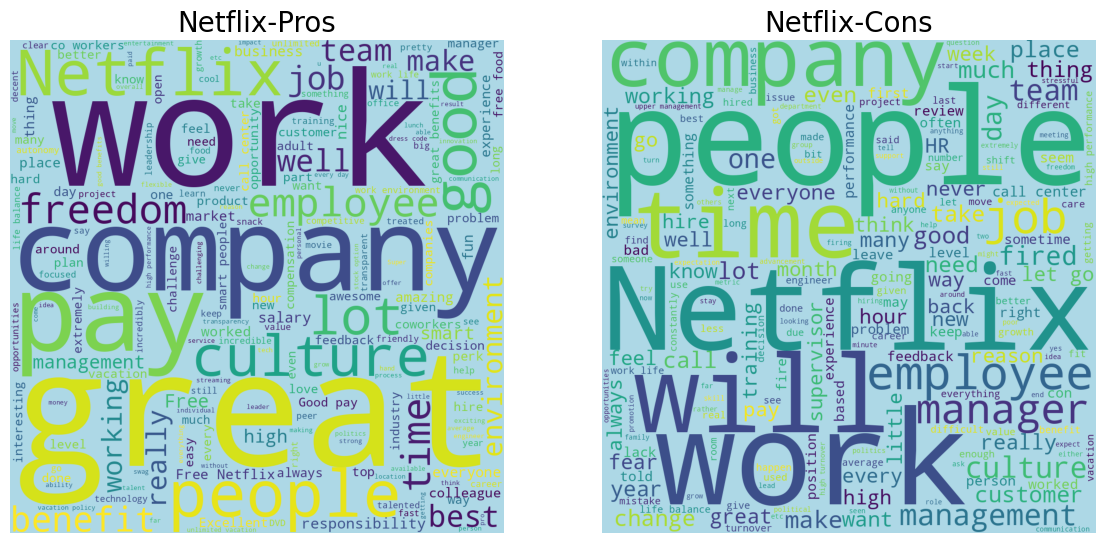

In [25]:
plt.rcParams['figure.figsize'] = (14,11)
pros=' '.join([text for text in df['Pros'][df['Company'] == 'netflix']])

wordcloud = WordCloud(background_color='lightblue', width = 1000, height =1000).generate(pros)
plt.subplot(1,2,1)
plt.title('Netflix-Pros' ,fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons =' '.join([text for text in df['Cons'][df['Company'] == 'netflix']])

wordcloud2 = WordCloud(background_color = 'lightblue', width = 1000 , height = 1000).generate(cons)
plt.subplot(1,2,2)
plt.title('Netflix-Cons' ,fontsize = 20 )
plt.imshow(wordcloud2)
plt.axis('off')

(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

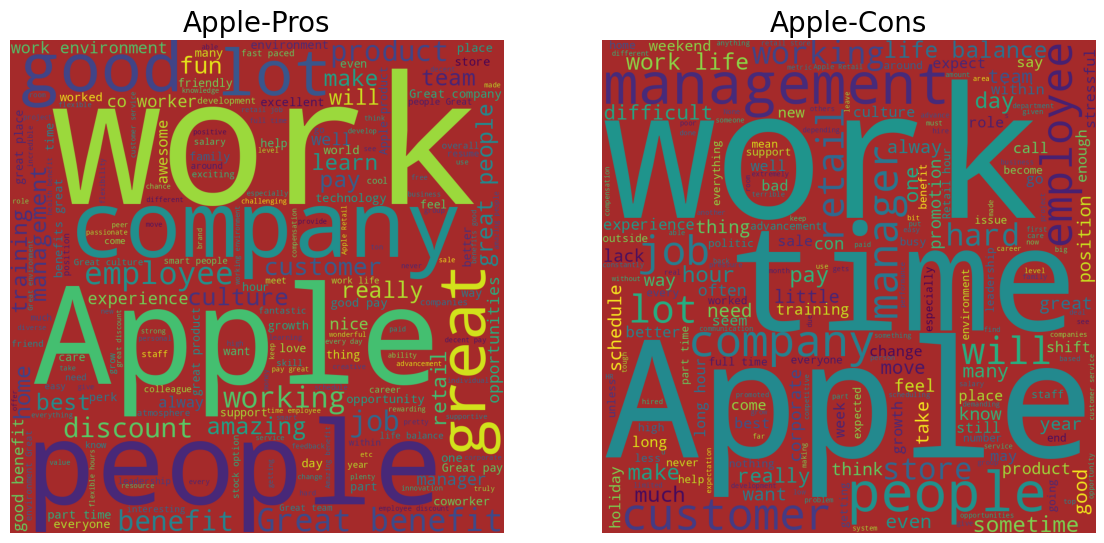

In [26]:
plt.rcParams['figure.figsize'] = (14,11)
pros=' '.join([text for text in df['Pros'][df['Company'] == 'apple']])

wordcloud = WordCloud(background_color='brown', width = 1000, height =1000).generate(pros)
plt.subplot(1,2,1)
plt.title('Apple-Pros' ,fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons =' '.join([text for text in df['Cons'][df['Company'] == 'apple']])

wordcloud2 = WordCloud(background_color = 'brown', width = 1000 , height = 1000).generate(cons)
plt.subplot(1,2,2)
plt.title('Apple-Cons' ,fontsize = 20 )
plt.imshow(wordcloud2)
plt.axis('off')

(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

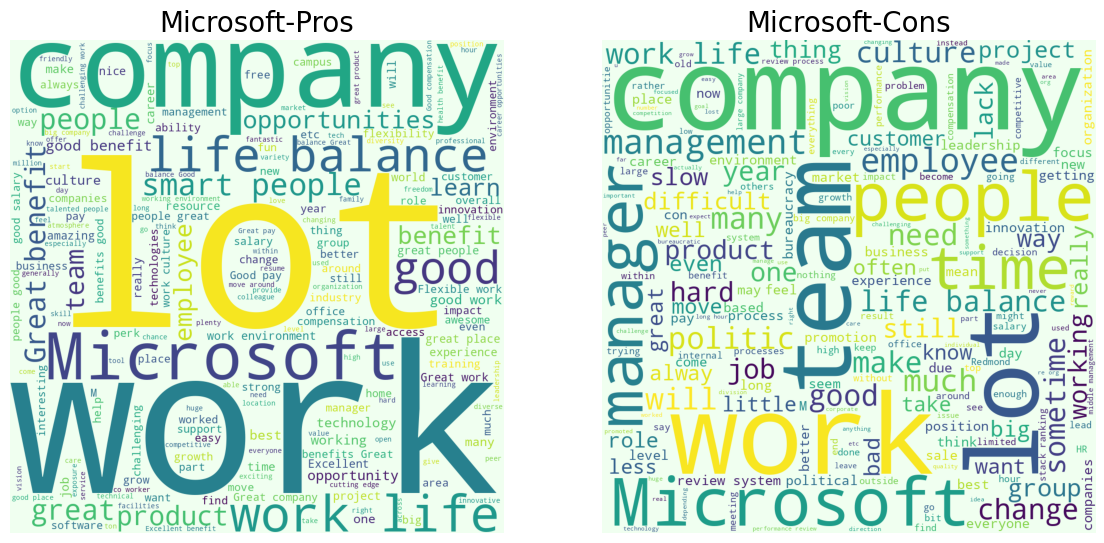

In [27]:
plt.rcParams['figure.figsize'] = (14,11)
pros=' '.join([text for text in df['Pros'][df['Company'] == 'microsoft']])

wordcloud = WordCloud(background_color='honeydew', width = 1000, height =1000).generate(pros)
plt.subplot(1,2,1)
plt.title('Microsoft-Pros' ,fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons =' '.join([text for text in df['Cons'][df['Company'] == 'microsoft']])

wordcloud2 = WordCloud(background_color = 'honeydew', width = 1000 , height = 1000).generate(cons)
plt.subplot(1,2,2)
plt.title('Microsoft-Cons' ,fontsize = 20 )
plt.imshow(wordcloud2)
plt.axis('off')

(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

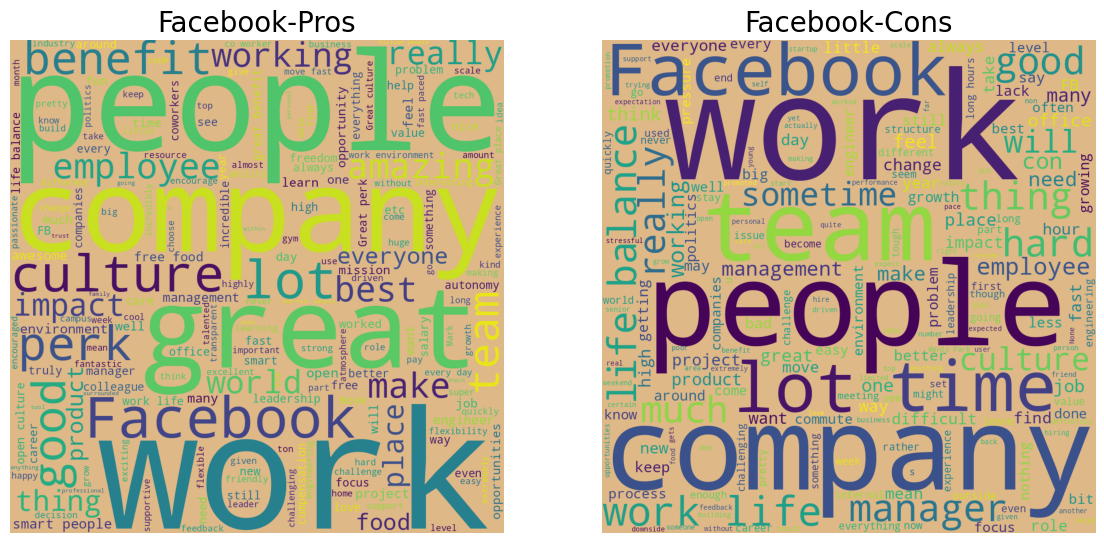

In [29]:
plt.rcParams['figure.figsize']=(14,11)
pros=' '.join([text for text in df['Pros'][df['Company'] =='facebook']])

wordcloud = WordCloud(background_color = 'burlywood', width = 1000, height = 1000).generate(pros)
plt.subplot(1,2,1)
plt.title('Facebook-Pros',fontsize=20)
plt.imshow(wordcloud)
plt.axis('off')

cons=' '.join([text for text in df['Cons'][df['Company'] =='facebook']])

wordcloud = WordCloud(background_color = 'burlywood', width = 1000, height = 1000).generate(cons)
plt.subplot(1,2,2)
plt.title('Facebook-Cons',fontsize=20)
plt.imshow(wordcloud)
plt.axis('off')


/tmp/ipython-input-1055224759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Job-Title",data=df.head(50), palette = 'pastel')


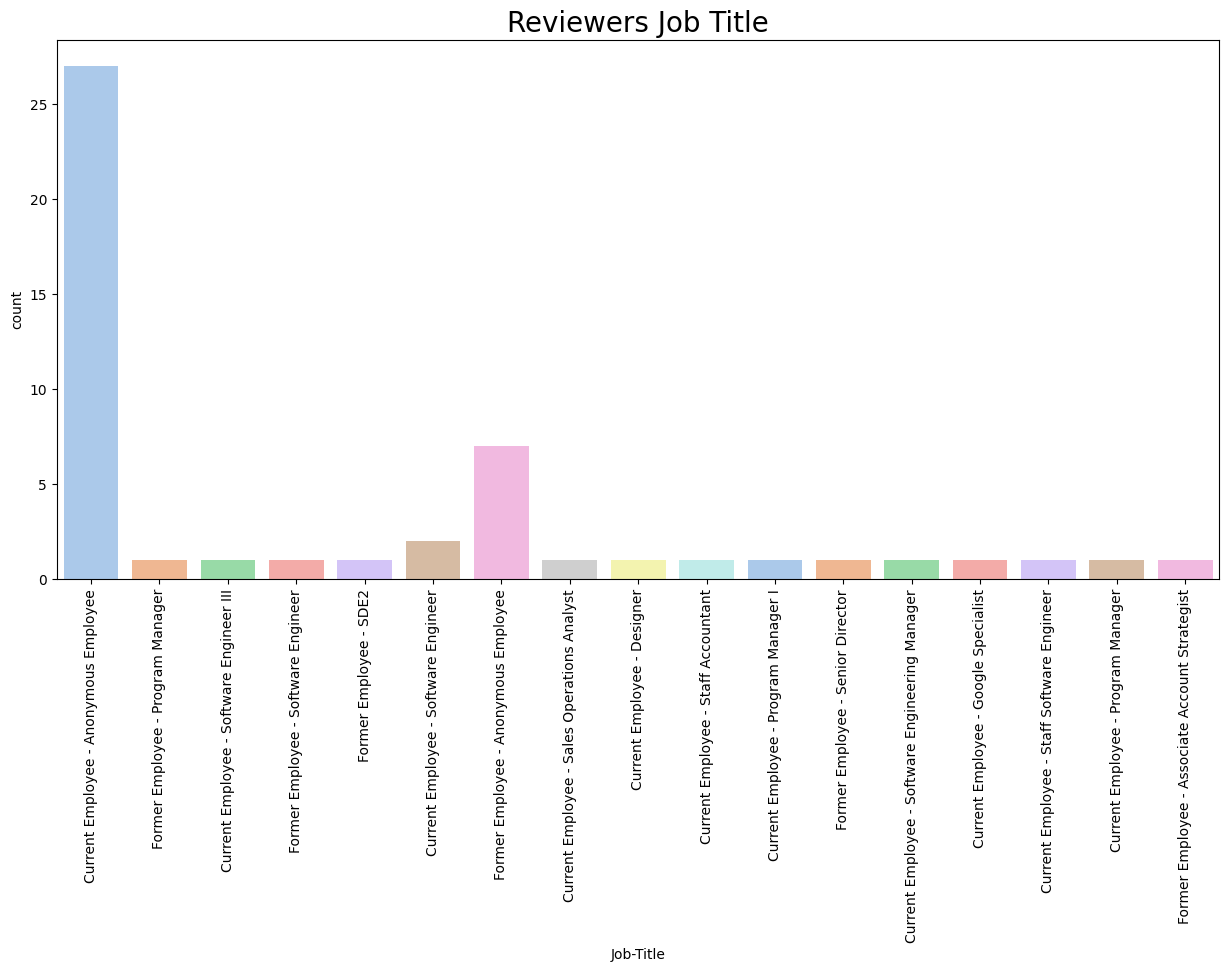

In [33]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(x="Job-Title",data=df.head(50), palette = 'pastel')
plt.title('Reviewers Job Title', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()


In [37]:
netflix=df['Helpful-Count'][df['Company']=='netflix'].sum().mean()
amazon = df['Helpful-Count'][df['Company'] == 'amazon'].sum().mean()
google = df['Helpful-Count'][df['Company'] == 'google'].sum().mean()
microsoft = df['Helpful-Count'][df['Company'] == 'microsoft'].sum().mean()
apple = df['Helpful-Count'][df['Company'] == 'apple'].sum().mean()
facebook = df['Helpful-Count'][df['Company'] == 'facebook'].sum().mean()

In [38]:
# let's make a pie chart for avg. useful counts for each of the company
size = [netflix, amazon, google, microsoft, apple, facebook]
labels = "Netflix", "Amazon", "Google", "Microsoft", "Apple", "Facebook"
colors = ['pink', 'lightgreen', 'lightblue', 'gold', 'hotpink', 'slateblue']


This code creates a donut chart showing each company's share of helpful review counts. It uses plt.pie() for the chart and adds a white circle in the center to make it look like a donut. Labels, percentages, and a legend are included for clarity.









Ask ChatGPT


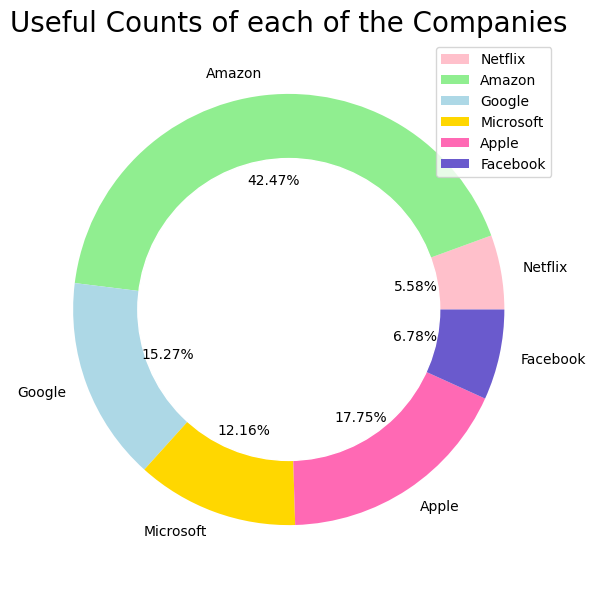

In [39]:
circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 7)
plt.pie(size, labels = labels, colors = colors, shadow = False, autopct = '%.2f%%')
plt.title('Useful Counts of each of the Companies', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()



We will now cluster few properties Creating average_rating by combining work-balance,career-opportunites,mangement,overall-rating,company-benefit

/tmp/ipython-input-707283018.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, palette = 'Set1')
/tmp/ipython-input-707283018.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, palette = 'Set2')
/tmp/ipython-input-707283018.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, palette = 'Set3')


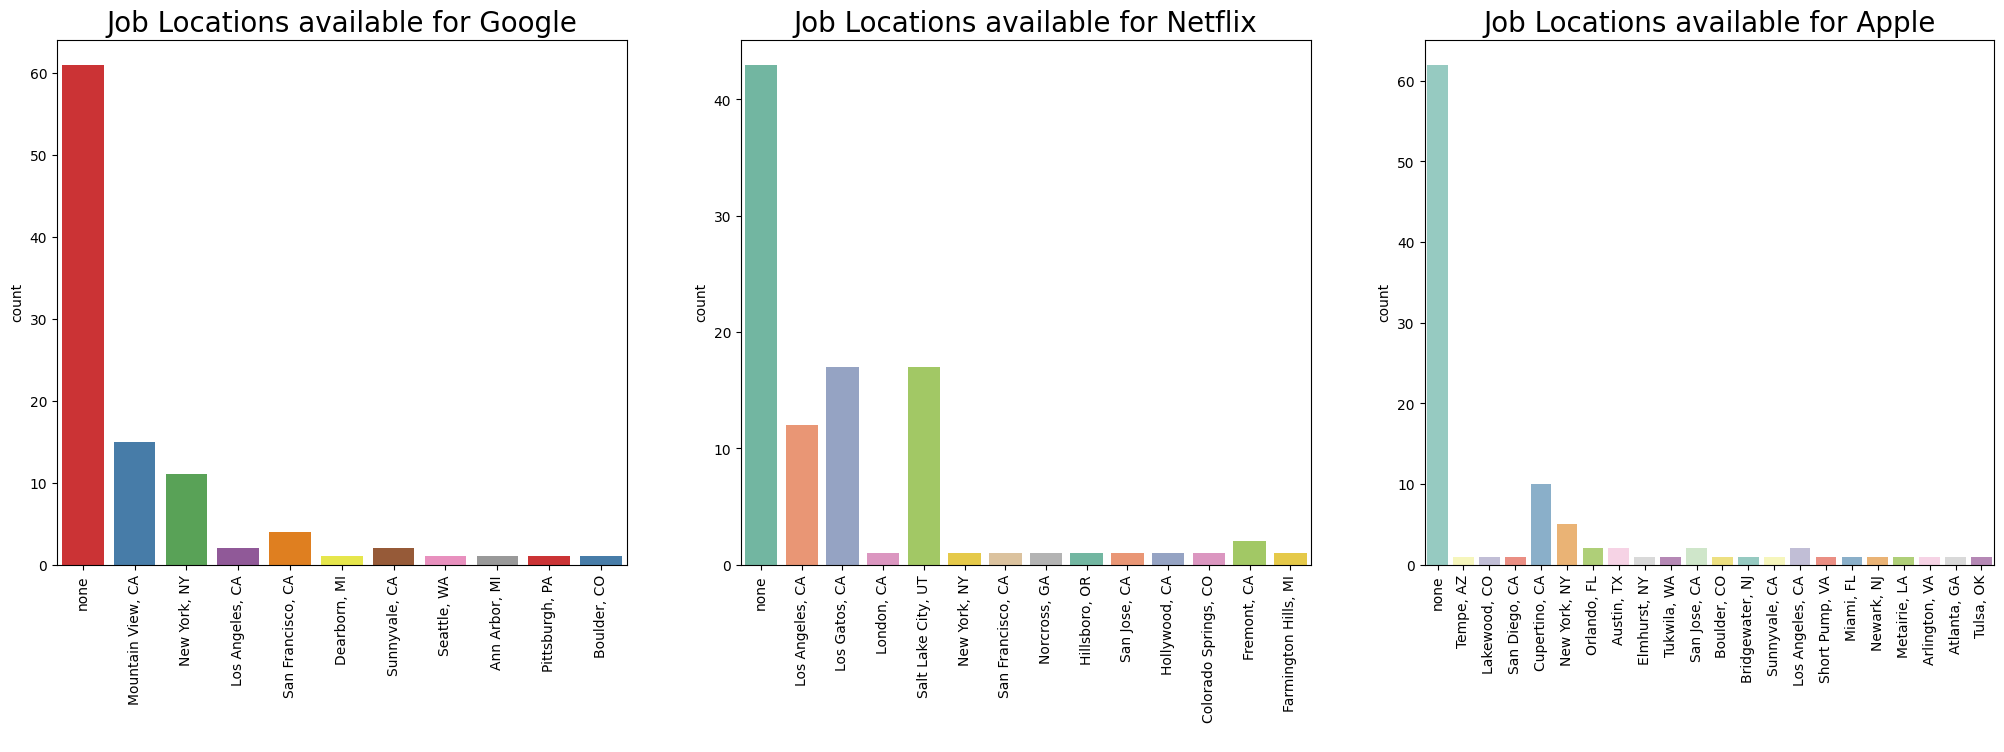

In [60]:
# checking the job locations available for google

plt.rcParams['figure.figsize'] = (25, 15)

plt.subplot(2, 3, 1)
x = df[df['Company'] == 'google']['Location'].head(100)

sns.countplot(x=x, palette = 'Set1')
plt.title('Job Locations available for Google', fontsize = 20)
plt.xlabel(' ')
plt.xticks(rotation = 90)


# checking the job locations available for netflix

plt.subplot(2, 3, 2)
x = df[df['Company'] == 'netflix']['Location'].head(100)

sns.countplot(x=x, palette = 'Set2')
plt.title('Job Locations available for Netflix', fontsize = 20)
plt.xlabel(' ')
plt.xticks(rotation = 90)



# checking the job locations available for apple

plt.subplot(2, 3, 3)
x = df[df['Company'] == 'apple']['Location'].head(100)

sns.countplot(x=x, palette = 'Set3')
plt.title('Job Locations available for Apple', fontsize = 20)
plt.xlabel(' ')
plt.xticks(rotation = 90)
plt.show()

/tmp/ipython-input-64188559.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, palette = 'pastel')
/tmp/ipython-input-64188559.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, palette = 'colorblind')
/tmp/ipython-input-64188559.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, palette = 'dark')


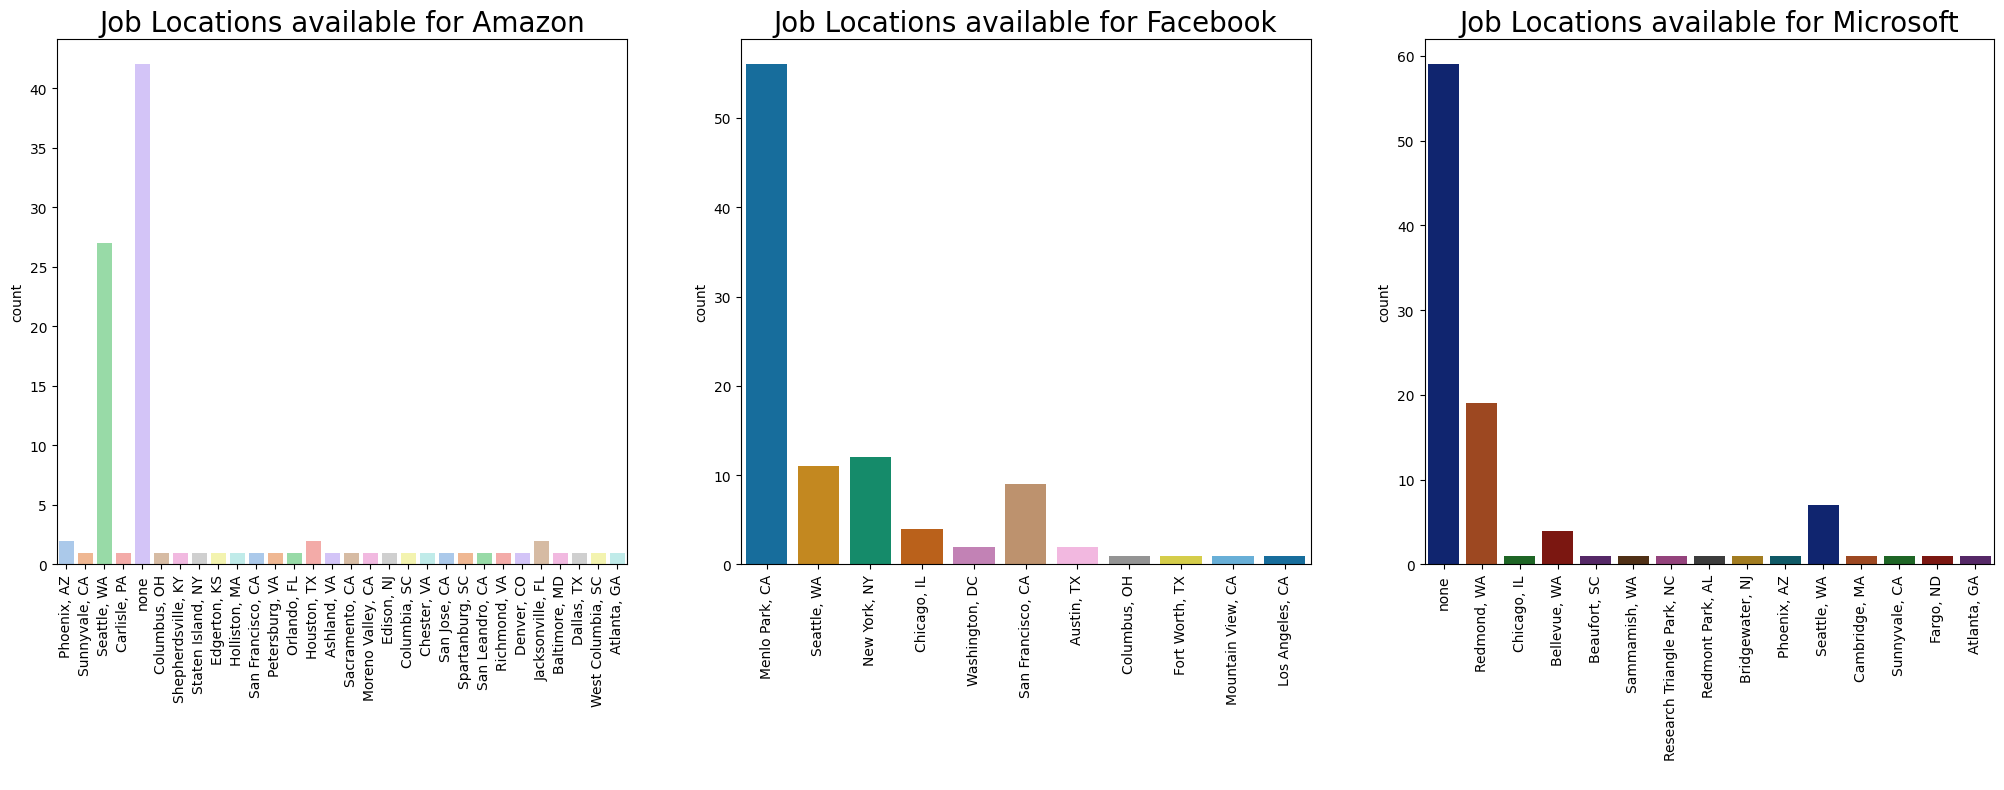

In [61]:
# checking the job locations available for amazon

plt.rcParams['figure.figsize'] = (25, 15)

plt.subplot(2, 3, 1)
x = df[df['Company'] == 'amazon']['Location'].head(100)

sns.countplot(x=x, palette = 'pastel')
plt.title('Job Locations available for Amazon', fontsize = 20)
plt.xlabel(' ')
plt.xticks(rotation = 90)



# checking the job locations available for facebook

plt.subplot(2, 3, 2)
x = df[df['Company'] == 'facebook']['Location'].head(100)

sns.countplot(x=x, palette = 'colorblind')
plt.title('Job Locations available for Facebook', fontsize = 20)
plt.xlabel(' ')
plt.xticks(rotation = 90)



# checking the job locations available for microsoft

plt.subplot(2, 3, 3)
x = df[df['Company'] == 'microsoft']['Location'].head(100)

sns.countplot(x=x, palette = 'dark')
plt.title('Job Locations available for Microsoft', fontsize = 20)
plt.xlabel(' ')
plt.xticks(rotation = 90)
plt.show()